<h5 style="margin-bottom: 5px; font-weight: bold;">Step 1: The Problem</h5>
<p style="font-size:17px; margin-top: 0; margin-bottom: 10px;">You have a 2D dataset of points and want to group them into <b>K clusters</b> based on proximity. Each cluster has a <b>centroid</b>, and points are assigned to their nearest centroid.</p>

<h6 style="margin-bottom: 5px; font-weight: bold;">K-Means Process Overview</h6>
<ol style="font-size:17px; margin-top: 0; margin-bottom: 10px;">
  <li style="margin-bottom: 5px;">Randomly initialize <b>K centroids</b>.</li>
  <li style="margin-bottom: 5px;">Assign each point to the <b>nearest centroid</b>.</li>
  <li style="margin-bottom: 5px;">Update centroids to the average position of points assigned to them.</li>
  <li>Repeat steps 2–3 until centroids <b>stabilize</b> or a fixed number of iterations is reached.</li>
</ol>


<h5 style="margin-bottom: 5px; font-weight: bold;">Step 2: Generate and Visualize the Data</h5>
<p style="font-size:17px; margin-top: 0; margin-bottom: 10px;">The first step is to create synthetic data to test the algorithm.</p>


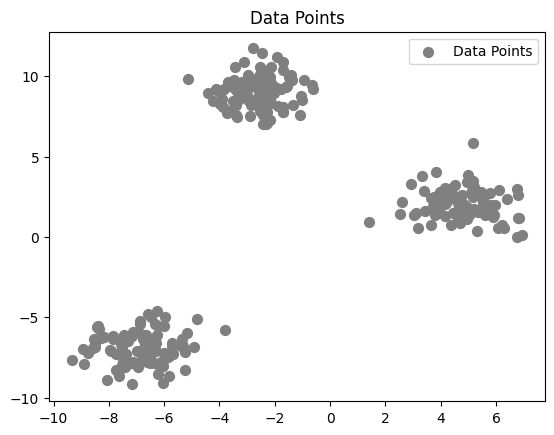

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c='gray', s=50, label='Data Points')
plt.title("Data Points")
plt.legend()
plt.show()


<h5 style="margin-bottom: 5px; font-weight: bold;">Step 3: Initialize Random Centroids</h5>
<p style="font-size:17px; margin-top: 0; margin-bottom: 10px;">The algorithm starts by randomly selecting <b>K</b> points as the initial centroids. These centroids represent the starting position of clusters.</p>


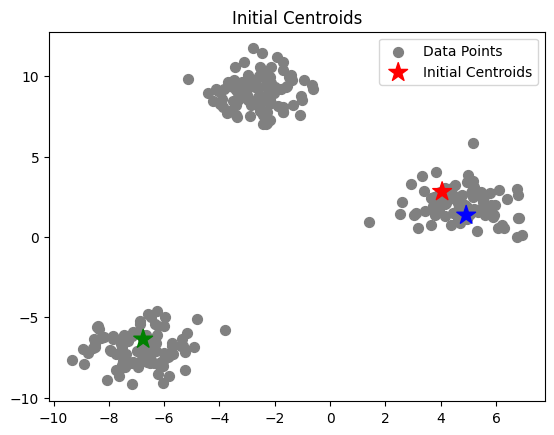

In [2]:
# Step 2: Initialize centroids randomly
k = 3  # Number of clusters
np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Plot the initial centroids
plt.scatter(X[:, 0], X[:, 1], c='gray', s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c=['red', 'green', 'blue'], s=200, label='Initial Centroids', marker='*')
plt.title("Initial Centroids")
plt.legend()
plt.show()

<h6 style="margin-bottom: 5px; font-weight: bold;">Explanation:</h6>
<ul style="font-size:17px; margin-top: 0; margin-bottom: 10px;">
  <li style="margin-bottom: 5px;">The initial centroids are chosen randomly from the dataset.</li>
  <li style="margin-bottom: 5px;">These centroids act as the "guesses" for where the cluster centers might be.</li>
</ul>


<h5 style="margin-bottom: 5px; font-weight: bold;">Step 4: Iterative Improvement</h5>
<p style="font-size:17px; margin-top: 0; margin-bottom: 10px;">The algorithm iteratively refines clusters by repeating two steps:</p>

<h6 style="margin-bottom: 5px; font-weight: bold;">Assign Points to Nearest Centroid:</h6>
<ul style="font-size:17px; margin-top: 0; margin-bottom: 10px;">
  <li style="margin-bottom: 5px;">Calculate the Euclidean distance between each point and all centroids.</li>
  <li style="margin-bottom: 5px;">Assign each point to the centroid it is closest to.</li>
</ul>

<h6 style="margin-bottom: 5px; font-weight: bold;">Update Centroids:</h6>
<ul style="font-size:17px; margin-top: 0; margin-bottom: 10px;">
  <li style="margin-bottom: 5px;">For each cluster, calculate the mean of all points assigned to it.</li>
  <li style="margin-bottom: 5px;">Update the centroid to this mean.</li>
</ul>

<p style="font-size:17px; margin-top: 0; margin-bottom: 10px;">This process is repeated until the centroids no longer change significantly.</p>


In [3]:
# Step 3: Iteratively improve clusters
def kmeans(X, centroids, iterations=5):
    for i in range(iterations):
        # Step 3.1: Assign points to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Compute distances
        labels = np.argmin(distances, axis=1)  # Assign clusters
        
        # Step 3.2: Update centroids based on the mean of assigned points
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # Plot the clustering progress
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, label='Clustered Points')
        plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c=['red', 'green', 'blue'], s=200, label='Centroids', marker='*')
        plt.title(f"Iteration {i + 1}")
        plt.legend()
        plt.show()
        
        # If centroids do not change, stop early
        if np.all(centroids == new_centroids):
            print("Converged!")
            break
        centroids = new_centroids  # Update centroids
    return labels, centroids

<h6 style="margin-bottom: 5px; font-weight: bold;">Explanation:</h6>
<ul style="font-size:17px; margin-top: 0; margin-bottom: 10px;">
  <li style="margin-bottom: 5px;">Distances: <code>np.linalg.norm</code> calculates the Euclidean distance between each point and each centroid.</li>
  <li style="margin-bottom: 5px;">Labels: Points are assigned to the nearest centroid based on minimum distance.</li>
  <li style="margin-bottom: 5px;">Centroid Update: For each cluster, the new centroid is the mean of all points assigned to it.</li>
  <li style="margin-bottom: 5px;">Convergence: The algorithm stops early if centroids don’t move between iterations.</li>
</ul>


<h5 style="margin-bottom: 5px; font-weight: bold;">Step 5: Run the Algorithm</h5>
<p style="font-size:17px; margin-top: 0; margin-bottom: 10px;">Run the function to see the clustering process step by step.</p>

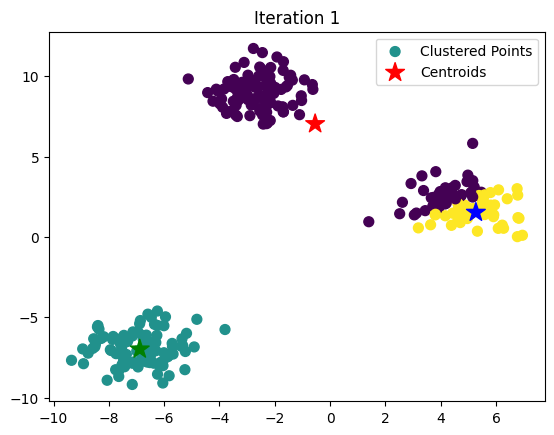

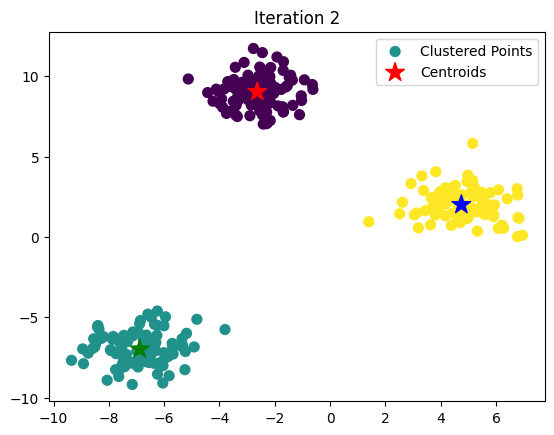

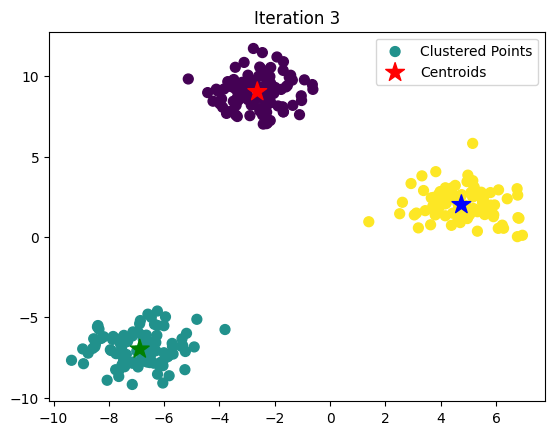

Converged!


In [4]:
# Run the K-Means algorithm
labels, final_centroids = kmeans(X, centroids)

<p style="font-size:17px; margin-top: 0; margin-bottom: 10px;">This will display the clustering progress at each iteration. The algorithm stops when centroids stabilize.</p>

<h5 style="margin-bottom: 5px; font-weight: bold;">Step 6: Final Clustering Visualization</h5>
<p style="font-size:17px; margin-top: 0; margin-bottom: 10px;">Finally, visualize the final result with stable centroids and clustered points.</p>

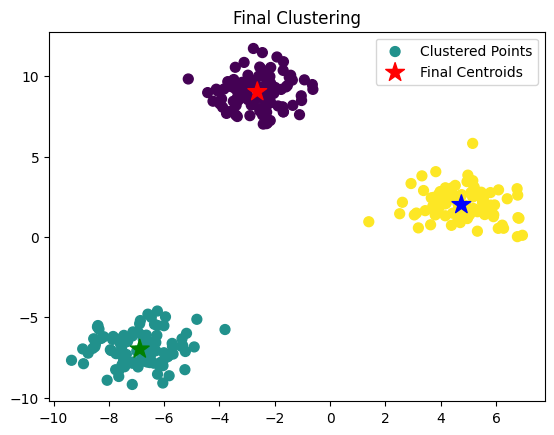

In [5]:
# Step 4: Plot final clustering
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, label='Clustered Points')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c=['red', 'green', 'blue'], s=200, label='Final Centroids', marker='*')
plt.title("Final Clustering")
plt.legend()
plt.show()

<h6 style="margin-bottom: 5px; font-weight: bold;">Explanation:</h6>
<ul style="font-size:17px; margin-top: 0; margin-bottom: 10px;">
  <li style="margin-bottom: 5px;">The final visualization shows the clusters with points colored by their assigned cluster and the stable centroids marked as stars.</li>
  <li style="margin-bottom: 5px;">Centroids no longer change, indicating that the algorithm has converged.</li>
</ul>